# Experiments

## 0.

In [4]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import scipy.io as spio
import networkx as nx

import sys
sys.path.append('./src') ##

from sketching import Svdr
from experiment import Experiment

# import matplotlib_inline
# %matplotlib inline
# matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'svg')

In [5]:
%%bash
lscpu

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Address sizes:       36 bits physical, 48 bits virtual
Byte Order:          Little Endian
CPU(s):              4
On-line CPU(s) list: 0-3
Vendor ID:           GenuineIntel
Model name:          Intel(R) Core(TM) i3-8130U CPU @ 2.20GHz
CPU family:          6
Model:               142
Thread(s) per core:  2
Core(s) per socket:  2
Socket(s):           1
Stepping:            10
CPU max MHz:         2201.0000
CPU min MHz:         0.0000
BogoMIPS:            4402.00
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush dts acpi mmx fxsr sse sse2 ss ht tm pbe syscall nx pdpe1gb rdtscp lm pni pclmulqdq dtes64 monitor est tm2 ssse3 fma cx16 xtpr pdcm pcid sse4_1 sse4_2 x2apic movbe popcnt tsc_deadline_timer aes xsave osxsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch fsgsbase bmi1 avx2 smep bmi2 erms invpcid mpx rdseed adx smap clflushopt ibrs ibpb stibp ssbd
Hypervisor vendor:

## 1. Hyperspectral Images (HSIs)

### 1.1. Pavia City Center
https://www.ehu.eus/ccwintco/index.php?title=Hyperspectral_Remote_Sensing_Scenes

shape: (102, 1096, 715)
min_elem: 0.0
max_elem: 8000.0


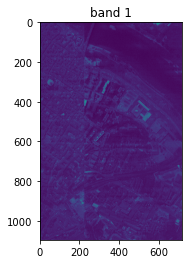

In [6]:
# original image

HSI_path = 'data/Pavia.mat'
HSI_mat = spio.loadmat(HSI_path)
HSI_data = HSI_mat['pavia']
HSI_data = np.moveaxis(HSI_data, -1, 0)

img = HSI_data

print('shape: %s\nmin_elem: %.1f\nmax_elem: %.1f' % (img.shape, img.min(), img.max()))
band = 1
plt.imshow(img[band])
plt.title(f'band {band}')
plt.show()

shape: (102, 300, 300)
min_elem: 0.0
max_elem: 1.0


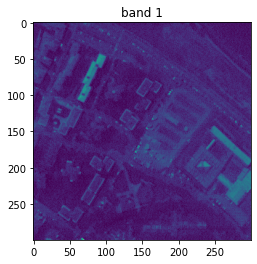

In [24]:
# subimage

HSI_path = 'data/Pavia.mat'
HSI_mat = spio.loadmat(HSI_path)
HSI_data = HSI_mat['pavia']
HSI_data = np.moveaxis(HSI_data, -1, 0) / HSI_data.max()

img = HSI_data[:, 250:250+300, 250:250+300]

print('shape: %s\nmin_elem: %.1f\nmax_elem: %.1f' % (img.shape, img.min(), img.max()))
band = 1
plt.imshow(img[band])
plt.title(f'band {band}')
plt.show()

In [25]:
svdrList = []
svdrList.append(Svdr('SVD'))
svdrList.append(Svdr('HMT',   p=1,   k=70,  distr='normal'))
svdrList.append(Svdr('HMT',   p=0,   k=70,  distr='rademacher', rho=0.2))
svdrList.append(Svdr('Tropp', k=75,  l=110, distr='normal'))
svdrList.append(Svdr('Tropp', k=75,  l=110, distr='rademacher', rho=0.2))
svdrList.append(Svdr('GN',    l=150,        distr='normal'))
svdrList.append(Svdr('GN',    l=150,        distr='rademacher', rho=0.2))

In [26]:
hoRanks = [60, 60, 60]
ttRanks = [54, 54]
itersNum = 100

ex = Experiment(img, svdrList)
ex.setRanks(hoRanks=hoRanks, ttRanks=ttRanks)

In [32]:
ex.runInitialSvd(ttsvd=True, hosvd=True)

Initial TT-SVD
---------------------------------------
time (s.)                   |   3.61851
negative elements (fro)     |   9.22459
negative elements (che)     |   0.08874
negative elements (density) |   0.03334
relative error (fro)        |   0.16742
relative error (che)        |   0.57698
r2_score                    |   0.92477
compression                 |     10.24
---------------------------------------
Initial HOSVD
---------------------------------------
time (s.)                   |   3.95542
negative elements (fro)     |  10.57919
negative elements (che)     |   0.09516
negative elements (density) |   0.03547
relative error (fro)        |   0.17583
relative error (che)        |   0.58652
r2_score                    |   0.91702
compression                 |     35.56
---------------------------------------


In [31]:
ex.run(ttsvd=True, hosvd=True, itersNum=itersNum)

TT-SVD
-----------------------------------
SVD                     |   2.47 s.
HMT(1,70), N(0,1)       |   2.44 s.
HMT(0,70), Rad(0.2)     |   1.70 s.
Tropp(75,110), N(0,1)   |   2.50 s.
Tropp(75,110), Rad(0.2) |   3.58 s.
GN(150), N(0,1)         |   4.72 s.
GN(150), Rad(0.2)       |   3.86 s.
-----------------------------------
HOSVD
-----------------------------------
SVD                     |   3.13 s.
HMT(1,70), N(0,1)       |   4.21 s.
HMT(0,70), Rad(0.2)     |   9.52 s.
Tropp(75,110), N(0,1)   |   3.74 s.
Tropp(75,110), Rad(0.2) |   3.57 s.
GN(150), N(0,1)         |   1.38 s.
GN(150), Rad(0.2)       |   4.01 s.
-----------------------------------


In [27]:
ex.timeit(ttsvd=True, hosvd=True, itersNum=itersNum)

TT-SVD
-----------------------------------
SVD                     |   2.41 s.
HMT(1,70), N(0,1)       |   2.18 s.
HMT(0,70), Rad(0.2)     |   1.40 s.
Tropp(75,110), N(0,1)   |   3.01 s.
Tropp(75,110), Rad(0.2) |   2.20 s.
GN(150), N(0,1)         |   0.98 s.
GN(150), Rad(0.2)       |   1.00 s.
-----------------------------------
HOSVD
-----------------------------------
SVD                     |   3.33 s.
HMT(1,70), N(0,1)       |   2.94 s.
HMT(0,70), Rad(0.2)     |   1.93 s.
Tropp(75,110), N(0,1)   |   2.30 s.
Tropp(75,110), Rad(0.2) |   1.61 s.
GN(150), N(0,1)         |   1.55 s.
GN(150), Rad(0.2)       |   1.63 s.
-----------------------------------


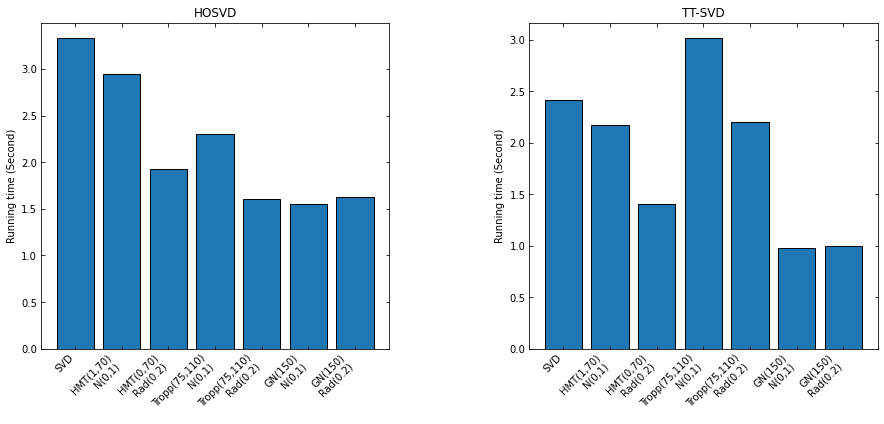

In [29]:
fig, ax = ex.plotRuntimes(ttsvd=True, hosvd=True, figsize=(15,6), wspace=0.4)

fig.savefig('figs/pavia_runtimes.pdf', bbox_inches='tight')

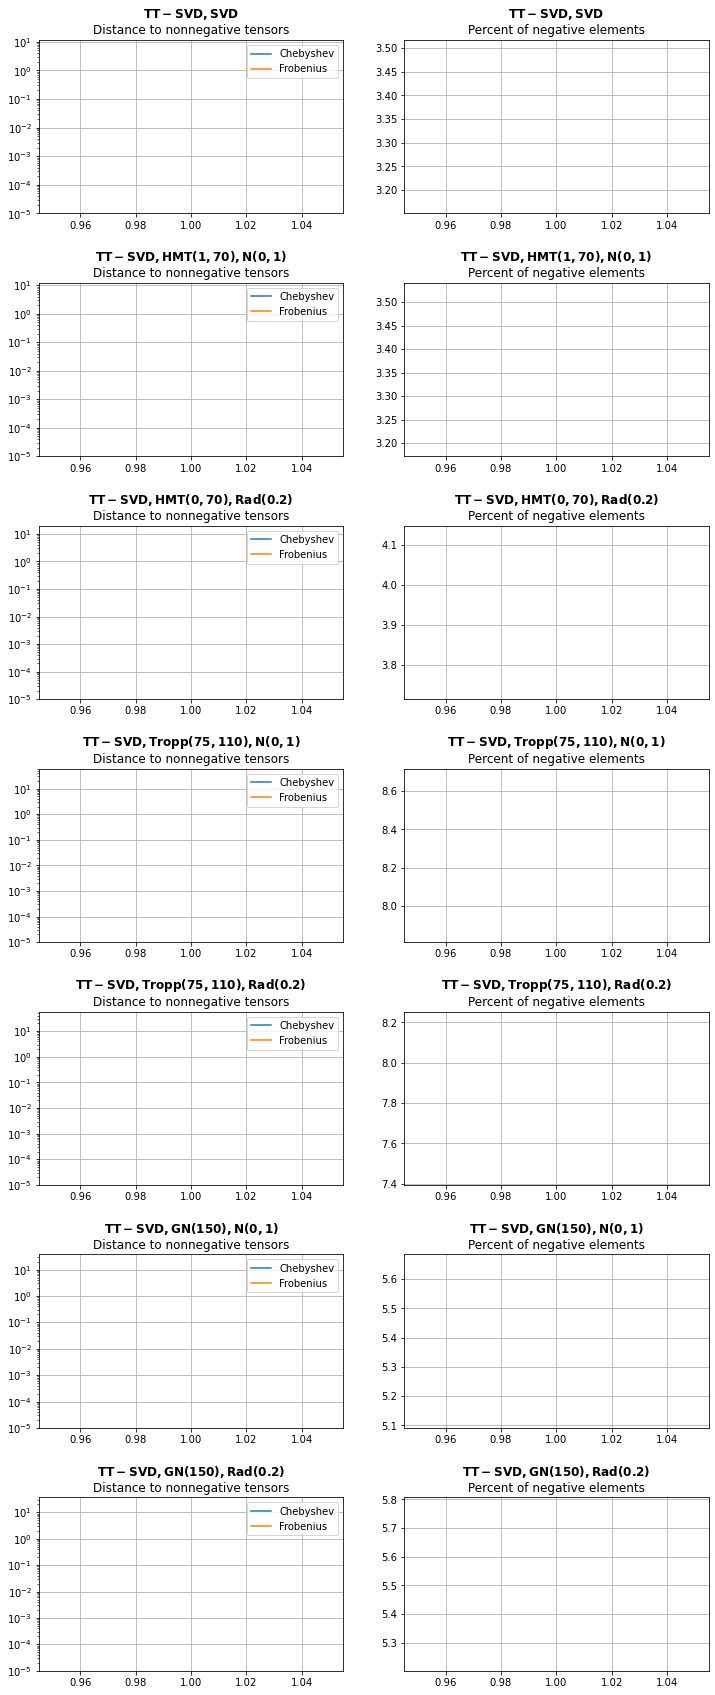

In [33]:
fig, ax = ex.plotConvergence(hosvd=False, figsize=(12, 30))

## savefig
for i in range(ax.shape[0]):   
    extent = ax[i,0].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    extent.x0 -= 0.5
    extent.x1 += 5.2
    extent.y1 += 0.5
    extent.y0 -= 0.3
    fname = 'pavia_conv_tt_%d.pdf' % i
    fig.savefig(fname, transparent=True, bbox_inches=extent)

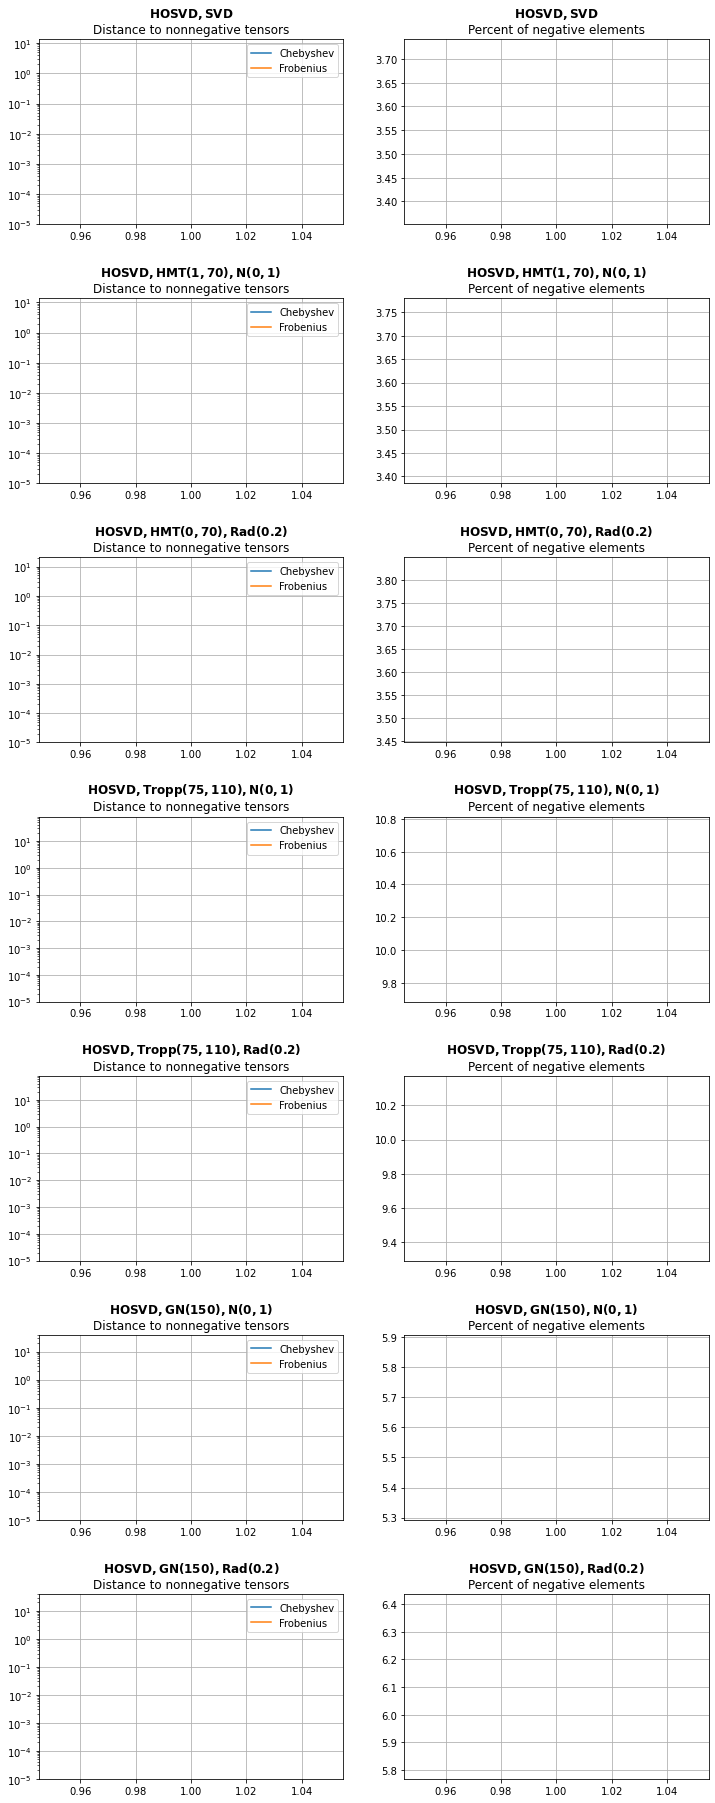

In [38]:
fig, ax = ex.plotConvergence(ttsvd=False)

## savefig
for i in range(ax.shape[0]):   
    extent = ax[i,0].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    extent.x0 -= 0.5
    extent.x1 += 5.2
    extent.y1 += 0.5
    extent.y0 -= 0.3
    fname = 'pavia_conv_ho_%d.pdf' % i
    fig.savefig(fname, transparent=True, bbox_inches=extent)

In [34]:
ex.printErrors()

| TT-SVD                  | relative error (fro) | relative error (che) | r2_score |
------------------------------------------------------------------------------------
| SVD                     |              0.16742 |              0.57698 | 0.924772 |
| HMT(1,70), N(0,1)       |              0.17114 |              0.60238 | 0.921387 |
| HMT(0,70), Rad(0.2)     |              0.23010 |              0.63010 | 0.857896 |
| Tropp(75,110), N(0,1)   |              0.37774 |              0.66364 | 0.617035 |
| Tropp(75,110), Rad(0.2) |              0.37660 |              0.74200 | 0.619334 |
| GN(150), N(0,1)         |              0.31966 |              0.70566 | 0.725740 |
| GN(150), Rad(0.2)       |              0.32154 |              0.72182 | 0.722514 |
------------------------------------------------------------------------------------
| HOSVD                   | relative error (fro) | relative error (che) | r2_score |
-----------------------------------------------------------------

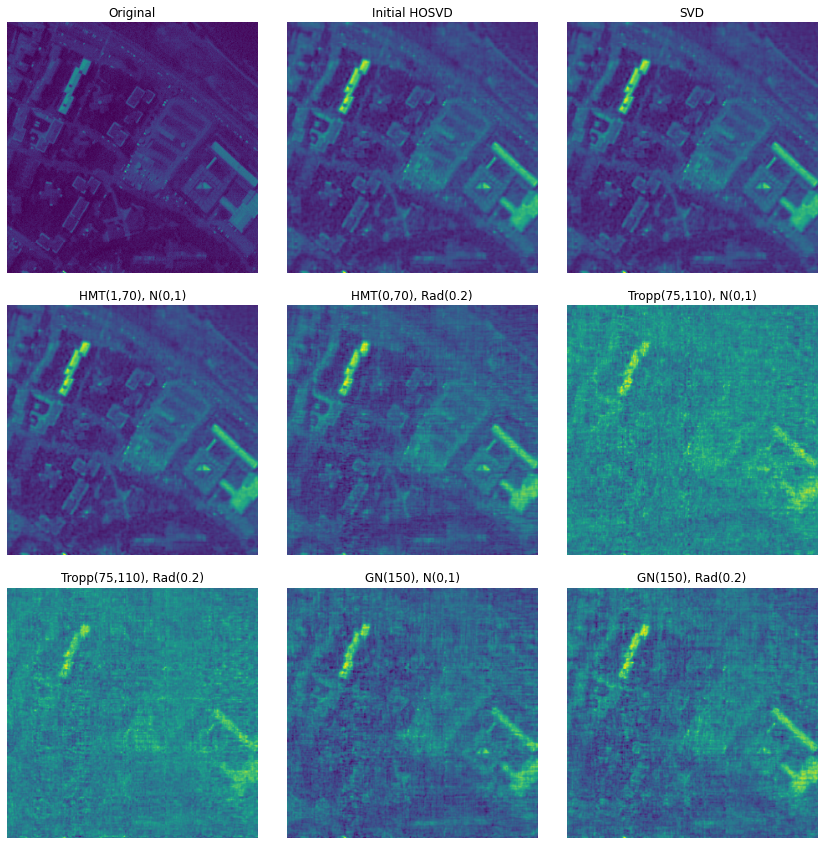

In [36]:
## HOSVD

fig, ax = ex.showApproximations(ttsvd=False)

fig.savefig('figs/pavia_approximations_ho.pdf', bbox_inches='tight')

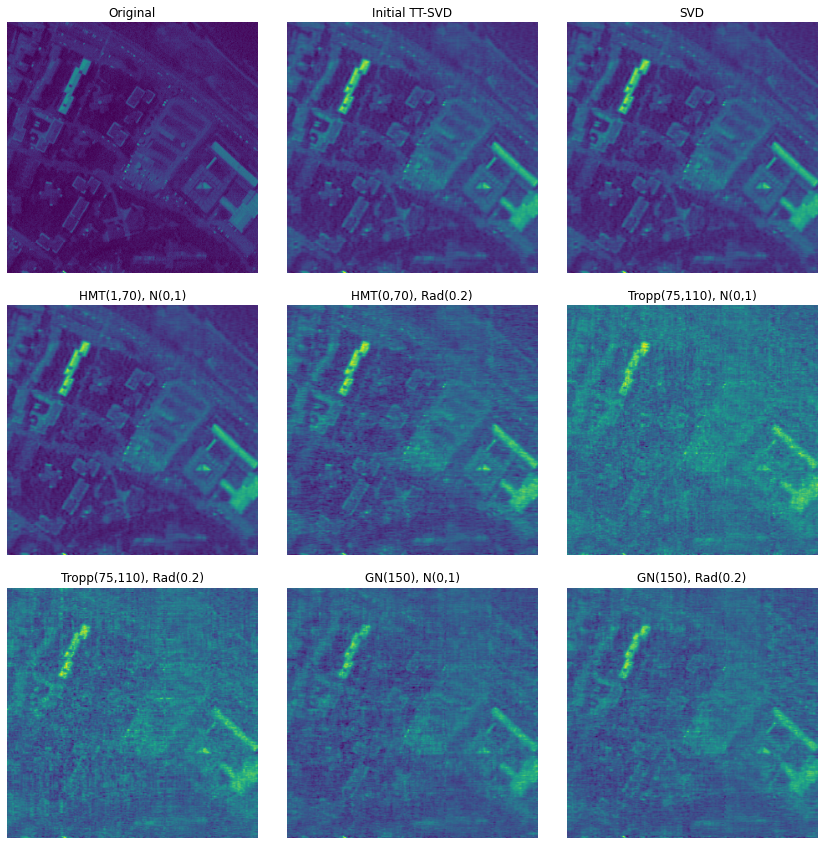

In [37]:
## TT-SVD

fig, ax = ex.showApproximations(hosvd=False)

fig.savefig('pavia_approximations_tt.pdf', bbox_inches='tight')

### 1.2. Washington, DC
https://github.com/JakobSig/HSI2RGB/blob/master/washington_hsi.mat

shape: (191, 307, 307)
min_elem: 0.0
max_elem: 1.0


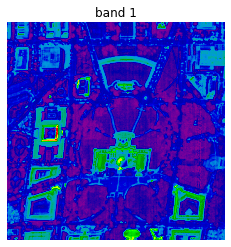

In [50]:
HSI_path = 'data/washington_hsi.mat'
HSI_mat = spio.loadmat(HSI_path)
HSI_data = HSI_mat['Y']
HSI_data = np.moveaxis(HSI_data, -1, 0)
img = HSI_data / HSI_data.max()

print('shape: %s\nmin_elem: %.1f\nmax_elem: %.1f' % (img.shape, img.min(), img.max()))
band = 1
plt.imshow(img[band], cmap='nipy_spectral')
plt.title(f'band {band}')
plt.axis('off')
plt.show()

In [51]:
svdrList = []
svdrList.append(Svdr('SVD'))
svdrList.append(Svdr('HMT',   p=1,   k=70,  distr='normal'))
svdrList.append(Svdr('HMT',   p=0,   k=70,  distr='rademacher', rho=0.2))
svdrList.append(Svdr('Tropp', k=75,  l=110, distr='normal'))
svdrList.append(Svdr('Tropp', k=75,  l=110, distr='rademacher', rho=0.2))
svdrList.append(Svdr('GN',    l=150,        distr='normal'))
svdrList.append(Svdr('GN',    l=150,        distr='rademacher', rho=0.2))

In [52]:
hoRanks = [33, 40, 40]
ttRanks = [33, 33]
itersNum = 100

ex = Experiment(img, svdrList, hoRanks=hoRanks, ttRanks=ttRanks)

In [53]:
ex.runInitialSvd(ttsvd=True, hosvd=True)

Initial TT-SVD
---------------------------------------
time (s.)                   |  12.68995
negative elements (fro)     |   2.21814
negative elements (che)     |   0.06824
negative elements (density) |   0.03150
relative error (fro)        |   0.18146
relative error (che)        |   0.45327
r2_score                    |   0.94200
compression                 |     51.32
---------------------------------------
Initial HOSVD
---------------------------------------
time (s.)                   |   4.43244
negative elements (fro)     |   2.08144
negative elements (che)     |   0.07091
negative elements (density) |   0.02893
relative error (fro)        |   0.18450
relative error (che)        |   0.46223
r2_score                    |   0.94004
compression                 |    215.17
---------------------------------------


In [ ]:
ex.run(itersNum=itersNum)

TT-SVD
-----------------------------------
SVD                     | 437.17 s.
HMT(1,70), N(0,1)       | 247.73 s.
HMT(0,70), Rad(0.2)     | 193.31 s.
Tropp(75,110), N(0,1)   | 220.69 s.
Tropp(70,100), Rad(0.2) | 195.14 s.
GN(150), N(0,1)         |  98.69 s.
GN(150), Rad(0.2)       |  89.04 s.
-----------------------------------
HOSVD
-----------------------------------
SVD                     | 359.69 s.
HMT(1,70), N(0,1)       | 265.36 s.


In [ ]:
ex.timeit(itersNum=itersNum)

In [ ]:
_ = ex.plotConvergence(ttsvd=False)

## savefig
for i in range(ax.shape[0]):   
    extent = ax[i,0].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    extent.x0 -= 0.5
    extent.x1 += 5.2
    extent.y1 += 0.5
    extent.y0 -= 0.3
    fname = 'washington_conv_ho_%d.pdf' % i
    fig.savefig(fname, transparent=True, bbox_inches=extent)

In [ ]:
_ = ex.plotConvergence(hosvd=False)

## savefig
for i in range(ax.shape[0]):   
    extent = ax[i,0].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    extent.x0 -= 0.5
    extent.x1 += 5.2
    extent.y1 += 0.5
    extent.y0 -= 0.3
    fname = 'washington_conv_tt_%d.pdf' % i
    fig.savefig(fname, transparent=True, bbox_inches=extent)

In [ ]:
fig, ax = ex.plotRuntimes()

fig.savefig('figs/washington_runtimes.pdf', bbox_inches='tight')

In [ ]:
ex.printErrors()

In [ ]:
## HOSVD

fig, ax = ex.showApproximations(ttsvd=False)

fig.savefig('figs/washington_approximations_ho.pdf', bbox_inches='tight')

In [ ]:
## TT-SVD

fig, ax = ex.showApproximations(hosvd=False)

fig.savefig('figs/washington_approximations_tt.pdf', bbox_inches='tight')

## 2. Multidimensional Gaussian mixture

In [728]:
t0 = time()

N = 128
N1 = N
N2 = N-10
N3 = N+10
A = np.zeros([N1, N2,N3])
cov_mat = np.random.uniform(0, 1, [3,3])
cov_mat = cov_mat @ cov_mat.T
cov_mat = cov_mat / np.linalg.norm(cov_mat)
cov_mat2 = np.random.uniform(0, 1, [3,3])
cov_mat2 = cov_mat2 @ cov_mat2.T
cov_mat2 = cov_mat2 / np.linalg.norm(cov_mat2)

cov_mat3 = np.random.uniform(0, 1, [3,3])
cov_mat3 = cov_mat3 @ cov_mat3.T
cov_mat3 = cov_mat3 / np.linalg.norm(cov_mat3)

h = 4. / N
for i in range(N1):
    for j in range(N2):
        for k in range(N3):
            point = np.array([i*h, j*h, k*h])
            A[i,j,k] = np.exp(-point @ cov_mat  @ point) +\
                       np.exp(-point @ cov_mat2 @ point) +\
                       np.exp(-point @ cov_mat3 @ point)
            
print('%.2f s.' % (time() - t0))

53.81 s.


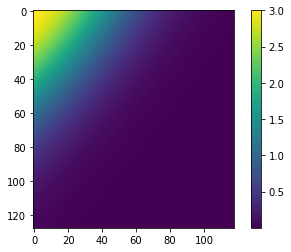

In [729]:
plt.imshow(A[:, :, 0])
plt.colorbar()

In [730]:
ho_ranks = (4, 5, 6)
tt_ranks = (4, 5)

SVDR(A, ho_ranks, tt_ranks)

---------------------------------------
HOSVD
---------------------------------------
time (s.)                   |   0.38503
negative elements (fro)     |   0.00898
negative elements (che)     |   0.00005
negative elements (density) |   0.26359
relative error (fro)        |   0.00012
relative error (che)        |   0.00056
---------------------------------------
TTSVD
---------------------------------------
time (s.)                   |   0.34553
negative elements (fro)     |   0.00900
negative elements (che)     |   0.00005
negative elements (density) |   0.20467
relative error (fro)        |   0.00012
relative error (che)        |   0.00057
---------------------------------------


In [731]:
params_hosvd = [dict(p=1,   k=70,  distr='normal'),\
                dict(p=0,   k=70,  distr='rademacher', rho=0.2),\
                dict(k=70,  l=100, distr='rademacher', rho=0.2),\
                dict(l=100,        distr='normal',     rho=0.2),\
                dict(l=150,        distr='rademacher', rho=0.2)]
params_ttsvd = [dict(p=1,   k=70,  distr='normal'),\
                dict(p=0,   k=70,  distr='rademacher', rho=0.2),\
                dict(k=70,  l=100, distr='normal',     rho=0.2),\
                dict(k=70,  l=100, distr='rademacher', rho=0.2),\
                dict(l=150,        distr='normal',     rho=0.2)]
algs_hosvd = [Svdr(SVD)]
algs_ttsvd = [Svdr(SVD)]
for i, alg in enumerate([HMT, HMT, Tropp, GN, GN]):
    algs_hosvd.append(Svdr(alg, **params_hosvd[i]))
for i, alg in enumerate([HMT, HMT, Tropp, Tropp, GN]):
    algs_ttsvd.append(Svdr(alg, **params_ttsvd[i]))

HMT(0,70), Rad(0.2)     | 111.05 s.


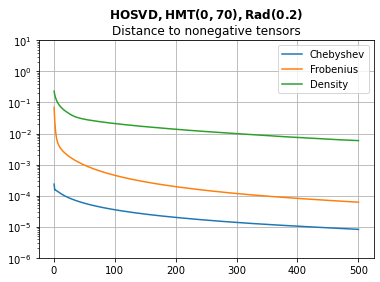

In [56]:
iters_num = 500
i = 2

mean_info = Info()
trials = 1

for _ in range(trials):
    info = Info()
    t0 = time()
    S, U_list = myHOSVD(a, ho_ranks, algs_hosvd[i], iters_num=iters_num, info=info)
    t1 = time()
    print('%-23s | %6.2f s.' % (algs_hosvd[i].get_name(), t1-t0))
    mean_info += info

mean_info /= trials

info_ = mean_info.get_info()
alg_name = mean_info.get_name()
plt.plot(range(1, iters_num+1), info_['chebyshev'], colors[0], label=norms[0])
plt.plot(range(1, iters_num+1), info_['frobenius'], colors[1], label=norms[1])
plt.plot(range(1, iters_num+1), info_['density'],   colors[2], label=norms[2])
plt.yscale('log')
plt.yticks(yticks)
plt.title('$\\bf{%s, %s}$\n%s' % ('HOSVD', alg_name, 'Distance to nonnegative tensors'))
plt.legend()
plt.grid()

### 2.1 $X_i = P_r(|X_{i-1}|) + min(X_{i-1})$

In [182]:
iters_num = 150

ar_info_list_hosvd = []
ar_info_list_ttsvd = []
ar_list_hosvd = []
ar_list_ttsvd = []
    
line = '-' * 35
print(line)
print('HOSVD')
print(line)
for i in range(len(algs_hosvd)):
    info = Info()
    t0 = time()
    S, U_list = myHOSVD2(a, ho_ranks, algs_hosvd[i], iters_num=iters_num, info=info)
    t1 = time()
    print('%-23s | %6.2f s.' % (algs_hosvd[i].get_name(), t1-t0))
    ar_list_hosvd.append(restore_tensor_hosvd(S, U_list))
    ar_info_list_hosvd.append(info)

print(line)
print('TT-SVD')
print(line)
for i in range(len(algs_ttsvd)):
    info = Info()
    t0 = time()
    G_list = myTTSVD2(a, tt_ranks, algs_ttsvd[i], iters_num=iters_num, info=info)
    t1 = time()
    print('%-23s | %6.2f s.' % (algs_ttsvd[i].get_name(), t1-t0))
    ar_list_ttsvd.append(restore_tensor_ttsvd(G_list))
    ar_info_list_ttsvd.append(info)
print(line)

-----------------------------------
HOSVD
-----------------------------------
SVD                     |  66.86 s.
HMT(1,70), N(0,1)       |  42.85 s.
HMT(0,70), Rad(0.2)     |  32.73 s.
Tropp(70,100), Rad(0.2) |  34.88 s.
GN(100), N(0,1)         |   9.40 s.
-----------------------------------
TT-SVD
-----------------------------------
SVD                     |  57.55 s.
HMT(1,70), N(0,1)       |  37.75 s.
HMT(0,70), Rad(0.2)     |  28.39 s.
Tropp(70,100), Rad(0.2) |  24.77 s.
GN(150), N(0,1)         |  10.95 s.
-----------------------------------


In [234]:
ar_info_list = [ar_info_list_hosvd, ar_info_list_ttsvd]
ar_list = [ar_list_hosvd, ar_list_ttsvd]
alg_names  = ['HOSVD', 'TT-SVD']
line = '-' * 73

for j in range(2):
    print(line)
    print('| %-23s | %s (fro) | %s (che) |' % (alg_names[j], 'relative error', 'relative error'))
    print(line)
    for i in range(len(ar_info_list_hosvd)):
        info = ar_info_list[j][i]
        ar = ar_list[j][i]
        fro = np.linalg.norm(a - ar) / np.linalg.norm(a)
        che = np.max(abs(a - ar)) / np.max(abs(a))
        print('| %-23s | %20.5f | %20.5f |' % (info.get_name(), fro, che))
print(line)

-------------------------------------------------------------------------
| HOSVD                   | relative error (fro) | relative error (che) |
-------------------------------------------------------------------------
| SVD                     |              0.00065 |              0.00162 |
| HMT(1,70), N(0,1)       |              0.00065 |              0.00162 |
| HMT(0,70), Rad(0.2)     |              0.00065 |              0.00162 |
| Tropp(70,100), Rad(0.2) |              0.00065 |              0.00162 |
| GN(100), N(0,1)         |              0.00261 |              0.00608 |
-------------------------------------------------------------------------
| TT-SVD                  | relative error (fro) | relative error (che) |
-------------------------------------------------------------------------
| SVD                     |              0.00529 |              0.01476 |
| HMT(1,70), N(0,1)       |              0.00529 |              0.01476 |
| HMT(0,70), Rad(0.2)     |           

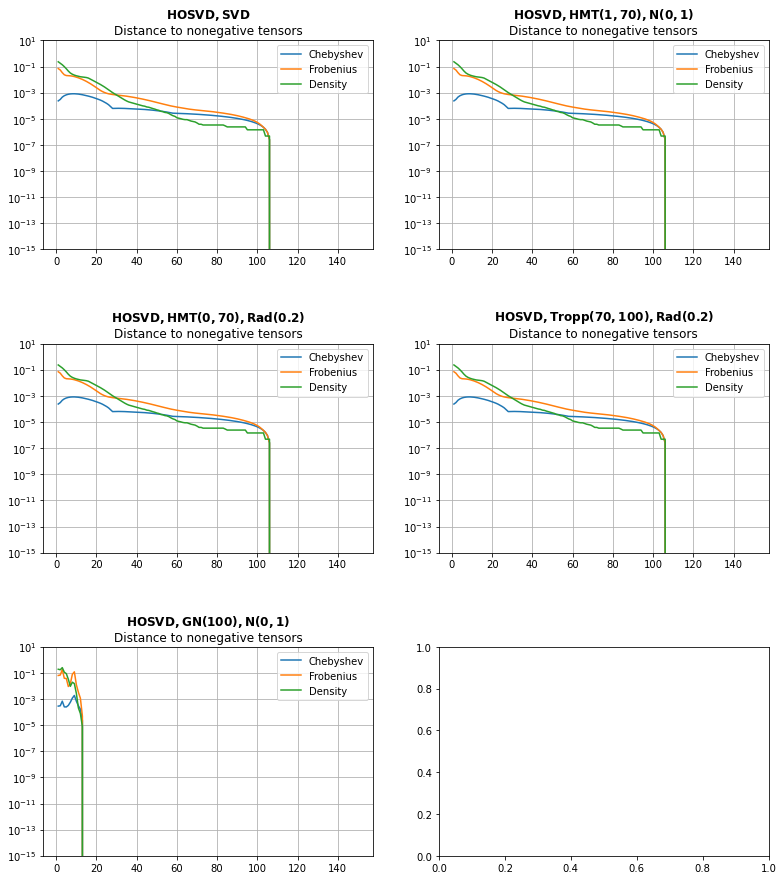

In [199]:
# HOSVD

title = 'Distance to nonnegative tensors'
info_list = ar_info_list_hosvd
fig, ax = plt.subplots(3, 2, figsize= (13, 15))   # (13, 60)

for k in range(len(info_list)):
    info = info_list[k].get_info()
    alg_name = info_list[k].get_name()
    i = k // 2
    j = k % 2
    ax[i,j].plot(range(1, iters_num+1), info['chebyshev'], colors[0], label=norms[0])
    ax[i,j].plot(range(1, iters_num+1), info['frobenius'], colors[1], label=norms[1])
    ax[i,j].plot(range(1, iters_num+1), info['density'],   colors[2], label=norms[2])
    ax[i,j].set_yscale('log')
    ax[i,j].set_yticks(yticks)
    ax[i,j].set_title('$\\bf{%s, %s}$\n%s' % ('HOSVD', alg_name, title))
    ax[i,j].legend()
    ax[i,j].grid()

plt.subplots_adjust(wspace=0.2, hspace=0.45)

In [200]:
# extent = ax[i,0].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
# extent.x0 -= 0.5
# extent.x1 += 5.7
# extent.y1 += 9.0
# extent.y0 -= 0.3
# fname = 'hosvd.jpg'
# fig.savefig(fname, transparent=True, bbox_inches=extent)

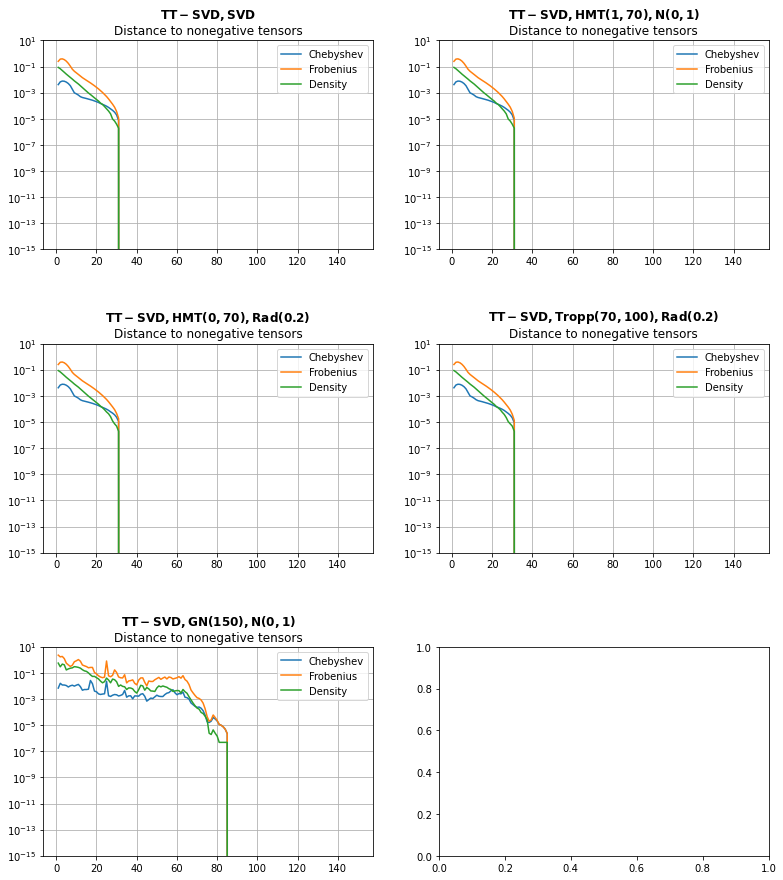

In [201]:
# TTSVD

title = 'Distance to nonnegative tensors'
info_list = ar_info_list_ttsvd
fig, ax = plt.subplots(3, 2, figsize= (13, 15))   # (13, 60)

for k in range(len(info_list)):
    info = info_list[k].get_info()
    alg_name = info_list[k].get_name()
    i = k // 2
    j = k % 2
    ax[i,j].plot(range(1, iters_num+1), info['chebyshev'], colors[0], label=norms[0])
    ax[i,j].plot(range(1, iters_num+1), info['frobenius'], colors[1], label=norms[1])
    ax[i,j].plot(range(1, iters_num+1), info['density'],   colors[2], label=norms[2])
    ax[i,j].set_yscale('log')
    ax[i,j].set_yticks(yticks)
    ax[i,j].set_title('$\\bf{%s, %s}$\n%s' % ('TT-SVD', alg_name, title))
    ax[i,j].legend()
    ax[i,j].grid()

plt.subplots_adjust(wspace=0.2, hspace=0.45)

In [202]:
# extent = ax[i,0].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
# extent.x0 -= 0.5
# extent.x1 += 5.7
# extent.y1 += 9.0
# extent.y0 -= 0.3
# fname = 'ttsvd.jpg'
# fig.savefig(fname, transparent=True, bbox_inches=extent)

# 3. Stochastic cubical tensors

In [17]:
# graph generators

gilbert    = lambda n: nx.to_numpy_array(nx.binomial_graph(n, p=0.5, directed=False))
smallw     = lambda n: nx.to_numpy_array(nx.navigable_small_world_graph(int(n ** 0.5)))
geo        = lambda n: nx.to_numpy_array(nx.random_geometric_graph(n, radius=(1.44/n)**0.5, dim=2, p=2))
pref       = lambda n: nx.to_numpy_array(nx.barabasi_albert_graph(n, m=2))
rank1      = lambda n: np.ones((n, n))

# erdrey     = lambda n: nx.to_numpy_array(nx.erdos_renyi_graph(n, p=0.5, directed=True))
# lockandkey = lambda n:

g = [gilbert, smallw, geo, pref, rank1]

def get_stochatic_tensor(n, m): ## PageRank, Alg. 2
    P = np.zeros((n, n**(m-1)))
    for i in range(1, n**(m-2) + 1):
        gr = g[np.random.choice(range(len(g)))]
        P[:, (i-1)*n:i*n] = gr(n)
    col_sums = P.sum(axis=0)
    zero_cols = np.where(col_sums == 0)
    for col in zero_cols:
        row = np.random.choice(range(n))
        P[row, col] = 1
    col_sums[col_sums == 0] = 1
    P /= col_sums
    return fold(P, mode=0, shape=(n,)*m)

In [18]:
ho_ranks = [4, 5, 6]
tt_ranks = [4, 5]
a = get_stochatic_tensor(64, 3)

SVDR(a, ho_ranks, tt_ranks)

---------------------------------------
HOSVD
---------------------------------------
time (s.)                   |   0.02290
negative elements (fro)     |   1.12288
negative elements (che)     |   0.25079
negative elements (density) |   0.01075
relative error (fro)        |   0.94419
relative error (che)        |   0.98997
---------------------------------------
TTSVD
---------------------------------------
time (s.)                   |   0.02002
negative elements (fro)     |   1.25337
negative elements (che)     |   0.24807
negative elements (density) |   0.01152
relative error (fro)        |   0.94033
relative error (che)        |   0.99164
---------------------------------------


In [703]:
params_hosvd = [dict(p=1,   k=70,  distr='normal'),\
                dict(p=0,   k=70,  distr='rademacher', rho=0.2),\
                dict(k=70,  l=100, distr='rademacher', rho=0.2),\
                dict(l=100,        distr='normal',     rho=0.2),\
                dict(l=100,        distr='rademacher', rho=0.2)]
params_ttsvd = [dict(p=1,   k=70,  distr='normal'),\
                dict(p=0,   k=70,  distr='rademacher', rho=0.2),\
                dict(k=70,  l=100, distr='rademacher', rho=0.2),\
                dict(l=150,        distr='normal',     rho=0.2),\
                dict(l=100,        distr='rademacher', rho=0.2)]
algs_hosvd = [Svdr(SVD)]
algs_ttsvd = [Svdr(SVD)]
for i, alg in enumerate([HMT, HMT, Tropp, GN]):
    algs_hosvd.append(Svdr(alg, **params_hosvd[i]))
for i, alg in enumerate([HMT, HMT, Tropp, GN]):
    algs_ttsvd.append(Svdr(alg, **params_ttsvd[i]))

In [620]:
iters_num = 2000

ar_info_list_hosvd = []
ar_info_list_ttsvd = []
ar_list_hosvd = []
ar_list_ttsvd = []
    
line = '-' * 35
print(line)
print('HOSVD')
print(line)
for i in range(len(algs_hosvd)):
    info = Info()
    t0 = time()
    S, U_list = myHOSVD(a, ho_ranks, algs_hosvd[i], iters_num=iters_num, info=info)
    t1 = time()
    print('%-23s | %6.2f s.' % (algs_hosvd[i].get_name(), t1-t0))
    ar_list_hosvd.append(restore_tensor_hosvd(S, U_list))
    ar_info_list_hosvd.append(info)

print(line)
print('TT-SVD')
print(line)
for i in range(len(algs_ttsvd)):
    info = Info()
    t0 = time()
    G_list = myTTSVD(a, tt_ranks, algs_ttsvd[i], iters_num=iters_num, info=info)
    t1 = time()
    print('%-23s | %6.2f s.' % (algs_ttsvd[i].get_name(), t1-t0))
    ar_list_ttsvd.append(restore_tensor_ttsvd(G_list))
    ar_info_list_ttsvd.append(info)
print(line)

-----------------------------------
HOSVD
-----------------------------------
SVD                     |  78.66 s.
HMT(1,70), N(0,1)       | 144.05 s.
HMT(0,70), Rad(0.2)     | 142.78 s.
Tropp(70,100), Rad(0.2) | 113.36 s.
GN(100), N(0,1)         |  28.93 s.
-----------------------------------
TT-SVD
-----------------------------------
SVD                     |  58.21 s.
HMT(1,70), N(0,1)       | 177.11 s.
HMT(0,70), Rad(0.2)     | 106.75 s.
Tropp(70,100), Rad(0.2) | 105.41 s.
GN(150), N(0,1)         |  42.18 s.
-----------------------------------


In [621]:
ar_info_list = [ar_info_list_hosvd, ar_info_list_ttsvd]
ar_list = [ar_list_hosvd, ar_list_ttsvd]
alg_names  = ['HOSVD', 'TT-SVD']
line = '-' * 73

for j in range(2):
    print(line)
    print('| %-23s | %s (fro) | %s (che) |' % (alg_names[j], 'relative error', 'relative error'))
    print(line)
    for i in range(len(ar_info_list_hosvd)):
        info = ar_info_list[j][i]
        ar = ar_list[j][i]
        fro = np.linalg.norm(a - ar) / np.linalg.norm(a)
        che = np.max(abs(a - ar)) / np.max(abs(a))
        print('| %-23s | %20.5f | %20.5f |' % (info.get_name(), fro, che))
print(line)

-------------------------------------------------------------------------
| HOSVD                   | relative error (fro) | relative error (che) |
-------------------------------------------------------------------------
| SVD                     |              0.94799 |              0.99136 |
| HMT(1,70), N(0,1)       |              0.94799 |              0.99136 |
| HMT(0,70), Rad(0.2)     |              0.94799 |              0.99136 |
| Tropp(70,100), Rad(0.2) |              0.94799 |              0.99136 |
| GN(100), N(0,1)         |              0.98601 |              1.00000 |
-------------------------------------------------------------------------
| TT-SVD                  | relative error (fro) | relative error (che) |
-------------------------------------------------------------------------
| SVD                     |              0.94120 |              0.99175 |
| HMT(1,70), N(0,1)       |              0.94120 |              0.99175 |
| HMT(0,70), Rad(0.2)     |           

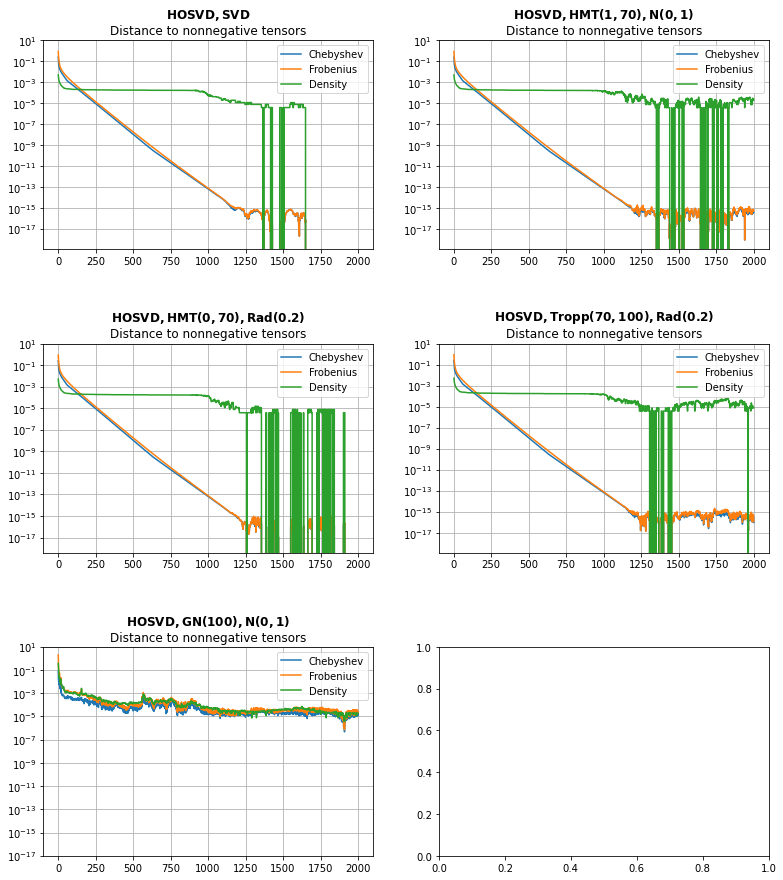

In [623]:
# HOSVD

title = 'Distance to nonnegative tensors'
info_list = ar_info_list_hosvd
fig, ax = plt.subplots(3, 2, figsize= (13, 15))   # (13, 60)

for k in range(len(info_list)):
    info = info_list[k].get_info()
    alg_name = info_list[k].get_name()
    i = k // 2
    j = k % 2
    ax[i,j].plot(range(1, iters_num+1), info['chebyshev'], colors[0], label=norms[0])
    ax[i,j].plot(range(1, iters_num+1), info['frobenius'], colors[1], label=norms[1])
    ax[i,j].plot(range(1, iters_num+1), info['density'],   colors[2], label=norms[2])
    ax[i,j].set_yscale('log')
    ax[i,j].set_yticks(yticks)
    ax[i,j].set_title('$\\bf{%s, %s}$\n%s' % ('HOSVD', alg_name, title))
    ax[i,j].legend()
    ax[i,j].grid()

plt.subplots_adjust(wspace=0.2, hspace=0.45)

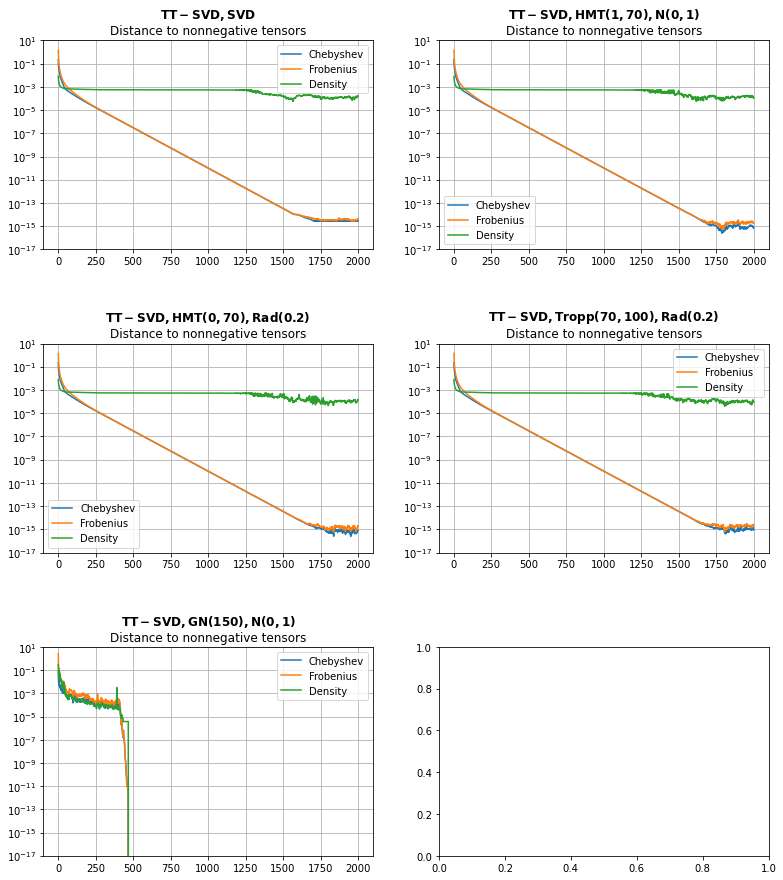

In [622]:
# TTSVD

title = 'Distance to nonnegative tensors'
info_list = ar_info_list_ttsvd
fig, ax = plt.subplots(3, 2, figsize= (13, 15))   # (13, 60)

for k in range(len(info_list)):
    info = info_list[k].get_info()
    alg_name = info_list[k].get_name()
    i = k // 2
    j = k % 2
    ax[i,j].plot(range(1, iters_num+1), info['chebyshev'], colors[0], label=norms[0])
    ax[i,j].plot(range(1, iters_num+1), info['frobenius'], colors[1], label=norms[1])
    ax[i,j].plot(range(1, iters_num+1), info['density'],   colors[2], label=norms[2])
    ax[i,j].set_yscale('log')
    ax[i,j].set_yticks(yticks)
    ax[i,j].set_title('$\\bf{%s, %s}$\n%s' % ('TT-SVD', alg_name, title))
    ax[i,j].legend()
    ax[i,j].grid()

plt.subplots_adjust(wspace=0.2, hspace=0.45)

In [14]:
r = 60 ######
ho_ranks = [r, r, r]
tt_ranks = [r, r]
a = get_stochatic_tensor(64, 3)

SVDR(a, ho_ranks, tt_ranks)

---------------------------------------
HOSVD
---------------------------------------
time (s.)                   |   0.05196
negative elements (fro)     |   3.10925
negative elements (che)     |   0.21703
negative elements (density) |   0.31722
relative error (fro)        |   0.24585
relative error (che)        |   0.48509
---------------------------------------
TTSVD
---------------------------------------
time (s.)                   |   0.02841
negative elements (fro)     |   3.10925
negative elements (che)     |   0.21703
negative elements (density) |   0.31722
relative error (fro)        |   0.24585
relative error (che)        |   0.48509
---------------------------------------


In [15]:
iters_num = 200

svdr = Svdr(GN, **dict(l=100, distr='rademacher', rho=0.2))
info = Info()

t0 = time()
G_list = myTTSVD(a, tt_ranks, svdr, iters_num=iters_num, info=info)
t1 = time()
print('%-23s | %6.2f s.' % (svdr.get_name(), t1-t0))

GN(100), Rad(0.2)       |   9.04 s.


In [16]:
np.linalg.norm(restore_tensor_ttsvd(G_list) - a) / np.linalg.norm(a)

0.9579033918788392

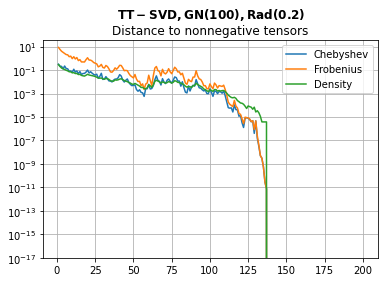

In [800]:
yticks = [10**(-x) for x in range(-1, 18, 2)]
plot_conv(info, title='TT-SVD')

### 3.1

In [801]:
def get_stochatic_tensor(shape):
    tensor = np.random.uniform(low=0.0, high=1.0, size=shape)
    mode_1 = unfold(tensor, mode=1)
    mode_1 = mode_1 / mode_1.sum(axis=0)
    return fold(mode_1, mode=1, shape=shape)

In [802]:
n = 128
shape = (n, n, n)
r = 10
ho_ranks = (r, r, r)
tt_ranks = (r, r)

a = get_stochatic_tensor(shape)

In [803]:
SVDR(a, ho_ranks, tt_ranks)

---------------------------------------
HOSVD
---------------------------------------
time (s.)                   |   0.46374
negative elements (fro)     |   0.00000
negative elements (che)     |   0.00000
negative elements (density) |   0.00000
relative error (fro)        |   0.49918
relative error (che)        |   0.57365
---------------------------------------
TTSVD
---------------------------------------
time (s.)                   |   0.40266
negative elements (fro)     |   0.00000
negative elements (che)     |   0.00000
negative elements (density) |   0.00000
relative error (fro)        |   0.49721
relative error (che)        |   0.58491
---------------------------------------
